## TASK 1

#### 1.1 SubTask 

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab.patches import cv2_imshow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Model, load_model, Sequential, save_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model


In [2]:
task11_dt=pd.read_csv('/content/housing.csv')

In [3]:
task11_dt.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
task11_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
task11_dt.shape

(20640, 10)

In [6]:
task11_dt.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Removing null values from the data

In [7]:
task11_dt.dropna(inplace=True)

Trying to identify the realationship and variation of target column 'median_house_value' with the categorical column 'edian_house_value'.

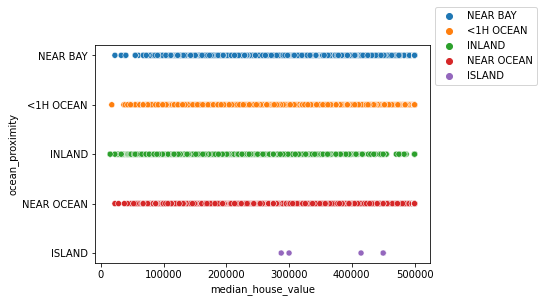

In [8]:
sns.scatterplot(data=task11_dt,x='median_house_value',y='ocean_proximity',hue='ocean_proximity')
plt.legend(loc='best', bbox_to_anchor=(1, 1, 0.2, 0.2))
plt.show()

From the above plot it is clear that median_house_value is independent of the column ocean_proximity so it can be dropped.

In [11]:
task11_dt=task11_dt.drop(labels='ocean_proximity', axis=1)


In [13]:
task11_dt.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [12]:
task11_dt.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Identifying the correlation of between other numeric columns in the data.

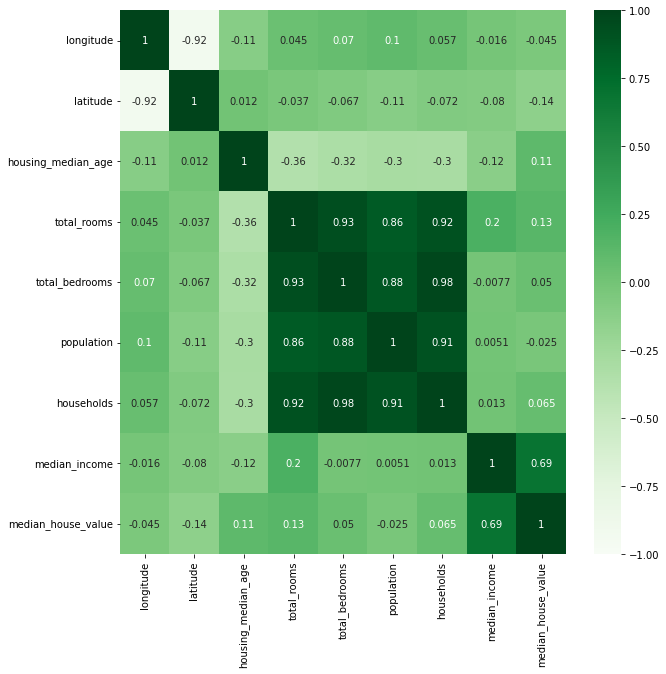

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data=task11_dt.corr(), vmin=-1, vmax=1,fmt='.2g',annot=True,cmap='Greens')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


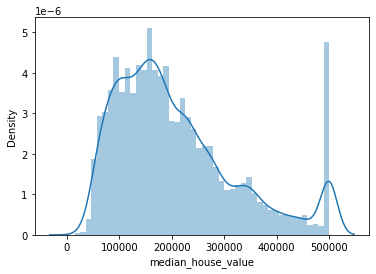

In [ ]:
sns.distplot(task11_dt['median_house_value'])
plt.show()

In [15]:
X = task11_dt.drop('median_house_value',axis=1)
y = task11_dt['median_house_value']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=150,epochs=400)

Epoch 1/400
96/96 [==============================] - 1s 3ms/step - loss: 56288145408.0000 - val_loss: 55719690240.0000
Epoch 2/400
96/96 [==============================] - 0s 2ms/step - loss: 56287928320.0000 - val_loss: 55719346176.0000
Epoch 3/400
96/96 [==============================] - 0s 2ms/step - loss: 56287440896.0000 - val_loss: 55718584320.0000
Epoch 4/400
96/96 [==============================] - 0s 2ms/step - loss: 56286220288.0000 - val_loss: 55716716544.0000
Epoch 5/400
96/96 [==============================] - 0s 2ms/step - loss: 56283377664.0000 - val_loss: 55712800768.0000
Epoch 6/400
96/96 [==============================] - 0s 2ms/step - loss: 56278065152.0000 - val_loss: 55705985024.0000
Epoch 7/400
96/96 [==============================] - 0s 2ms/step - loss: 56269586432.0000 - val_loss: 55695974400.0000
Epoch 8/400
96/96 [==============================] - 0s 2ms/step - loss: 56257024000.0000 - val_loss: 55680520192.0000
Epoch 9/400
96/96 [=============================

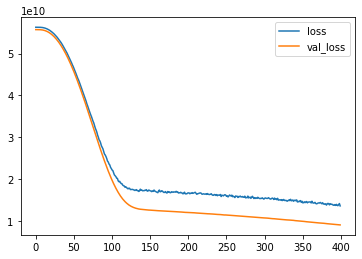

In [30]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(X_test)
print("Mean squared error :",np.sqrt(mean_squared_error(y_test,predictions)))


Mean squared error : 94881.03603932737


### 1.2 Sub task

In [129]:

data2 = pd.read_csv('/content/heart.csv',delimiter='\t',header=1)
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [130]:

data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [131]:
data2.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [132]:

X = data2.drop('target',axis=1)
y = data2['target']

In [133]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=2)


In [134]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

In [143]:
model2 = Sequential()
model2.add(Dense(activation = "relu", input_dim = 13, 
                     units = 8, kernel_initializer = "uniform"))
model2.add(Dense(activation = "relu", units = 14, 
                     kernel_initializer = "uniform"))
model2.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
model2.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )

In [144]:
h1=model2.fit(X_train , y_train ,validation_split=0.2, batch_size = 8 ,epochs = 100  )

Epoch 1/100
22/22 [==============================] - 23s 9ms/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6923 - val_accuracy: 0.5581
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5385 - val_loss: 0.6902 - val_accuracy: 0.5581
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5503 - val_loss: 0.6805 - val_accuracy: 0.6977
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.7396 - val_loss: 0.6573 - val_accuracy: 0.8140
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.7870 - val_loss: 0.6168 - val_accuracy: 0.8605
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6110 - accuracy: 0.7988 - val_loss: 0.5615 - val_accuracy: 0.8605
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7988 - val_loss: 0.5125 - val_accuracy: 0.8605
Epoch 8/100


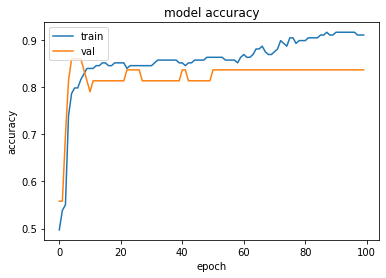

In [145]:
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [146]:
y_pred = model2.predict(X_test)
y_output= (y_pred > 0.5)

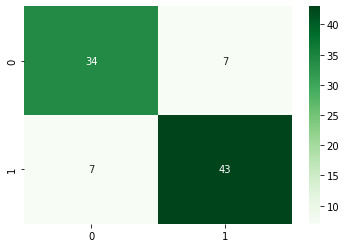

In [147]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_output)
sns.heatmap(cm, annot=True,cmap='Greens')
plt.show()

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_output))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.86      0.86      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



## TASK 2

#### 2.1 SubTask

In [792]:
import tensorflow as tf
cifar_dt=tf.keras.datasets.cifar10
(X_train,Y_train),(X_test,Y_test)=cifar_dt.load_data()


**Preparing a preprocessed normalized data**

In [793]:
def preprocess(sample):
    image = np.array(sample)
    image = image/255.
    return image

In [794]:
X_train = np.asarray(X_train)
X_train = np.asarray([preprocess(i) for i in X_train])
Y_train = np.asarray(Y_train)

In [795]:
X_test = np.asarray(X_test)
X_test = np.asarray([preprocess(i) for i in X_test])
Y_test = np.asarray(Y_test)

In [796]:
print("Train shapes: ", X_train.shape, Y_train.shape)
print("Test shapes: ", X_test.shape, Y_test.shape)

Train shapes:  (50000, 32, 32, 3) (50000, 1)
Test shapes:  (10000, 32, 32, 3) (10000, 1)


In [807]:
cifar_model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])


In [810]:
cifar_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [811]:
h3=cifar_model.fit(X_train,Y_train,validation_split=0.2,epochs=50)

Epoch 1/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2969 - sparse_categorical_accuracy: 0.5295 - val_loss: 1.5201 - val_sparse_categorical_accuracy: 0.4705
Epoch 2/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2926 - sparse_categorical_accuracy: 0.5336 - val_loss: 1.5755 - val_sparse_categorical_accuracy: 0.4581
Epoch 3/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2892 - sparse_categorical_accuracy: 0.5317 - val_loss: 1.5295 - val_sparse_categorical_accuracy: 0.4732
Epoch 4/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2838 - sparse_categorical_accuracy: 0.5334 - val_loss: 1.5098 - val_sparse_categorical_accuracy: 0.4753
Epoch 5/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2874 - sparse_categorical_accuracy: 0.5358 - val_loss: 1.5168 - val_sparse_categorical_accuracy: 0.4718
Epoch 6/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2869 - spars

Model evaluation

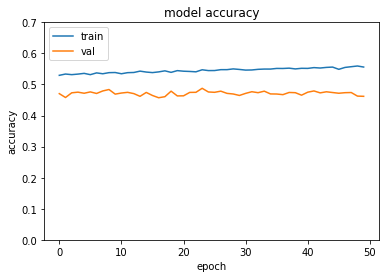

In [814]:
plt.plot(h3.history['sparse_categorical_accuracy'])
plt.plot(h3.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,0.7)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [815]:
test_loss,test_acc=cifar_model.evaluate(X_test,Y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.5863 - sparse_categorical_accuracy: 0.4651
Test accuracy: 0.4650999903678894


#### 2.2 Sub Task

In [255]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

**Preparing a preprocessed normalized data**

In [256]:
X_train = X_train / 255.0

In [257]:
X_test = X_test / 255.0

Images display 

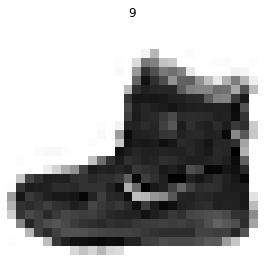

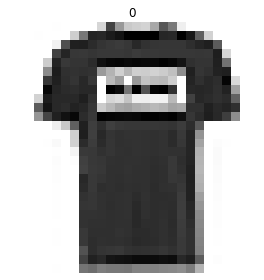

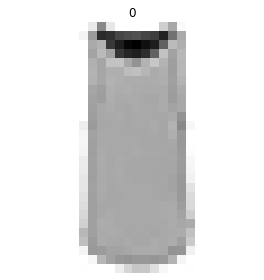

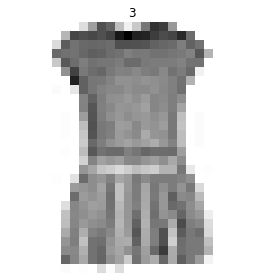

In [258]:
for i in range(4):
      plt.imshow(X_train[i], cmap = 'binary')
      plt.title(y_train[i])
      plt.axis('off')
      plt.tight_layout()
      plt.show()

In [242]:
X_train = X_train.reshape(-1, 28*28)

In [243]:
X_test.shape

(10000, 28, 28)

In [244]:
X_test = X_test.reshape(-1, 28*28)

In [245]:
fashion_model = tf.keras.models.Sequential()
fashion_model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))
fashion_model.add(tf.keras.layers.Dense(units=24, activation='relu'))
fashion_model.add(tf.keras.layers.Dropout(0.2))
fashion_model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [246]:
fashion_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [247]:
h4=fashion_model.fit(X_train, y_train, epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6666 - sparse_categorical_accuracy: 0.7609 - val_loss: 0.4387 - val_sparse_categorical_accuracy: 0.8390
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4560 - sparse_categorical_accuracy: 0.8384 - val_loss: 0.3771 - val_sparse_categorical_accuracy: 0.8633
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4064 - sparse_categorical_accuracy: 0.8552 - val_loss: 0.3687 - val_sparse_categorical_accuracy: 0.8682
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3739 - sparse_categorical_accuracy: 0.8661 - val_loss: 0.3430 - val_sparse_categorical_accuracy: 0.8682
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3500 - sparse_categorical_accuracy: 0.8736 - val_loss: 0.3468 - val_sparse_categorical_accuracy: 0.8737
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3340 - spars

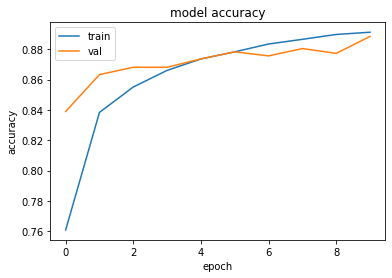

In [249]:
plt.plot(h4.history['sparse_categorical_accuracy'])
plt.plot(h4.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [252]:
test_loss, test_accuracy = fashion_model.evaluate(X_test, y_test)
print("Test accuracy:",test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.3391 - sparse_categorical_accuracy: 0.8816
Test accuracy: 0.881600022315979


---

## TASK 3

#### 3.1 Sub Task

In [259]:
sonar_dt=pd.read_csv('/content/sonar_csv.csv')

In [260]:
sonar_dt.shape

(208, 61)

In [261]:
sonar_dt.head(5)

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [262]:
sonar_dt.columns

Index(['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4',
       'attribute_5', 'attribute_6', 'attribute_7', 'attribute_8',
       'attribute_9', 'attribute_10', 'attribute_11', 'attribute_12',
       'attribute_13', 'attribute_14', 'attribute_15', 'attribute_16',
       'attribute_17', 'attribute_18', 'attribute_19', 'attribute_20',
       'attribute_21', 'attribute_22', 'attribute_23', 'attribute_24',
       'attribute_25', 'attribute_26', 'attribute_27', 'attribute_28',
       'attribute_29', 'attribute_30', 'attribute_31', 'attribute_32',
       'attribute_33', 'attribute_34', 'attribute_35', 'attribute_36',
       'attribute_37', 'attribute_38', 'attribute_39', 'attribute_40',
       'attribute_41', 'attribute_42', 'attribute_43', 'attribute_44',
       'attribute_45', 'attribute_46', 'attribute_47', 'attribute_48',
       'attribute_49', 'attribute_50', 'attribute_51', 'attribute_52',
       'attribute_53', 'attribute_54', 'attribute_55', 'attribute_56',
       'attribu

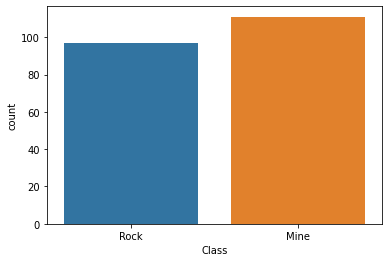

In [263]:
sns.countplot(data=sonar_dt,x='Class')
plt.show()

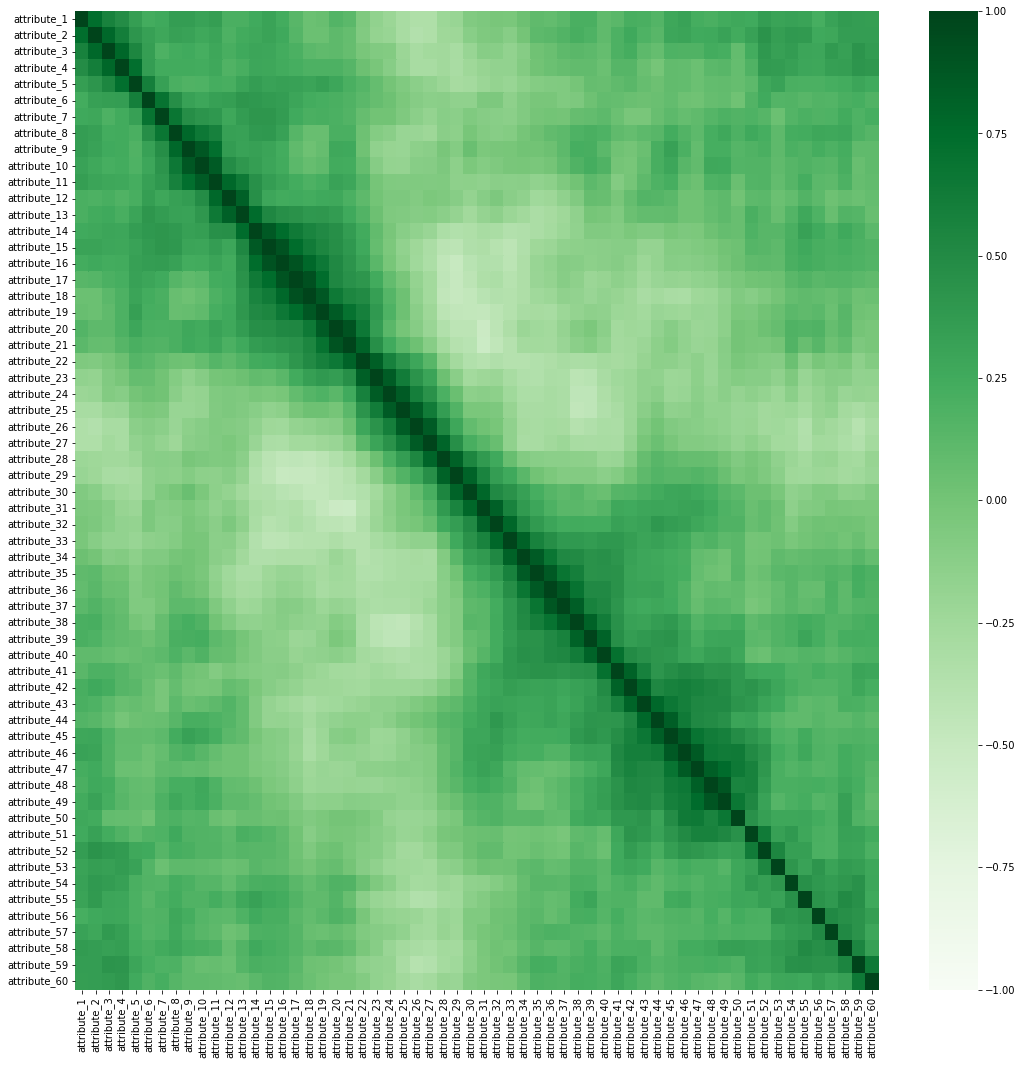

In [264]:
correlations = sonar_dt.corr()

fig = plt.figure(figsize=(18,18))
sns.heatmap(correlations,vmin=-1, vmax=1,fmt='.2g',cmap='Greens')

plt.show()

Encoding the target column to numeric values

In [265]:
sonar_dt['Class'].replace('Mine', 1, inplace=True)
sonar_dt['Class'].replace('Rock', 0, inplace=True)

In [266]:
sonar_dt.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [267]:
X = sonar_dt.drop('Class',axis=1)
y = sonar_dt['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [358]:
sonar_model= Sequential()
sonar_model.add(Dense(units = 48, activation = 'relu', kernel_initializer = 'uniform', input_dim = 60))
sonar_model.add(Dropout(rate = 0.4))
sonar_model.add(BatchNormalization())
sonar_model.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'uniform'))
#sonar_model.add(BatchNormalization())
sonar_model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [359]:
sonar_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [360]:
tf.random.set_seed(2)
h5=sonar_model.fit(X_train, Y_train, epochs = 20,validation_split=0.1)


Epoch 1/20
5/5 [==============================] - 1s 63ms/step - loss: 0.6931 - accuracy: 0.5231 - val_loss: 0.6932 - val_accuracy: 0.3333
Epoch 2/20
5/5 [==============================] - 0s 8ms/step - loss: 0.6925 - accuracy: 0.6077 - val_loss: 0.6938 - val_accuracy: 0.3333
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 0.6916 - accuracy: 0.6462 - val_loss: 0.6941 - val_accuracy: 0.3333
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 0.6912 - accuracy: 0.6769 - val_loss: 0.6940 - val_accuracy: 0.3333
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 0.6901 - accuracy: 0.6846 - val_loss: 0.6936 - val_accuracy: 0.3333
Epoch 6/20
5/5 [==============================] - 0s 13ms/step - loss: 0.6892 - accuracy: 0.7385 - val_loss: 0.6933 - val_accuracy: 0.4000
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.6878 - accuracy: 0.6923 - val_loss: 0.6930 - val_accuracy: 0.4667
Epoch 8/20
5/5 [===============

Model validation

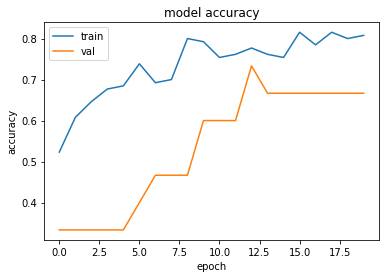

In [361]:
plt.plot(h5.history['accuracy'])
plt.plot(h5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [362]:
y_pred = sonar_model.predict(X_test) > 0.5

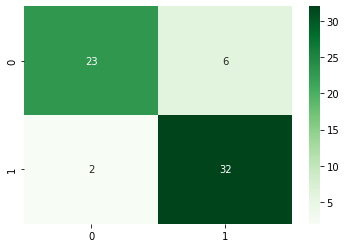

In [363]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True,cmap='Greens')
plt.show()

In [364]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        29
           1       0.84      0.94      0.89        34

    accuracy                           0.87        63
   macro avg       0.88      0.87      0.87        63
weighted avg       0.88      0.87      0.87        63



#### 3.2 Sub Task

In [365]:
mfeat_dt=pd.read_csv('/content/dataset_12_mfeat-factors.csv')

In [367]:
mfeat_dt.head(5)

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att178,att179,att180,att181,att182,att183,att184,att185,att186,att187,att188,att189,att190,att191,att192,att193,att194,att195,att196,att197,att198,att199,att200,att201,att202,att203,att204,att205,att206,att207,att208,att209,att210,att211,att212,att213,att214,att215,att216,class
0,98,236,531,673,607,647,2,9,3,6,8,5,225,517,652,624,628,994,7,22,28,13,10,19,305,481,667,663,1009,727,38,28,18,11,20,10,287,567,651,742,...,12,19,10,360,328,607,984,1186,599,29,7,14,6,9,9,362,314,924,733,601,1216,4,8,20,10,9,5,251,421,474,536,628,632,18,36,8,15,12,13,1
1,121,193,607,611,585,665,7,9,2,4,3,7,214,514,690,548,630,1006,2,18,31,15,5,15,260,344,655,605,993,743,29,32,25,11,17,6,308,412,719,700,...,8,18,8,351,249,687,922,1194,617,26,11,11,4,10,7,347,439,950,675,577,1222,13,6,27,10,10,3,224,354,520,458,570,634,15,32,11,13,15,11,1
2,115,141,590,605,557,627,12,6,3,3,5,4,196,404,611,560,594,986,7,21,28,14,7,12,278,406,670,579,991,703,24,29,18,12,19,9,378,468,668,654,...,9,20,13,415,323,672,896,1168,595,21,8,14,3,10,12,343,365,877,663,547,1192,18,7,20,13,10,2,196,348,535,498,572,656,20,35,16,14,13,6,1
3,90,122,627,692,607,642,0,6,4,5,3,5,201,445,664,629,626,945,5,21,27,16,7,9,273,397,703,662,987,710,36,29,21,8,15,10,331,459,731,765,...,7,16,10,380,354,711,987,1180,606,27,8,15,5,12,9,400,358,918,756,603,1171,6,7,23,11,12,5,263,419,576,549,628,621,16,35,7,12,15,9,1
4,157,167,681,666,587,666,8,6,1,4,5,5,212,386,740,613,614,997,5,21,30,11,7,17,248,390,703,662,949,744,28,29,20,13,19,10,244,468,797,743,...,8,20,6,337,303,763,989,1156,628,29,8,12,2,10,7,321,337,988,726,577,1225,14,7,22,8,10,5,276,342,594,525,568,653,16,35,10,15,13,13,1


In [368]:
mfeat_dt.columns

Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9',
       'att10',
       ...
       'att208', 'att209', 'att210', 'att211', 'att212', 'att213', 'att214',
       'att215', 'att216', 'class'],
      dtype='object', length=217)

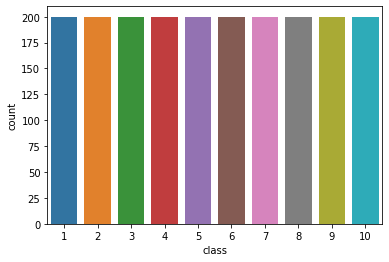

In [369]:
sns.countplot(data=mfeat_dt,x='class')
plt.show()

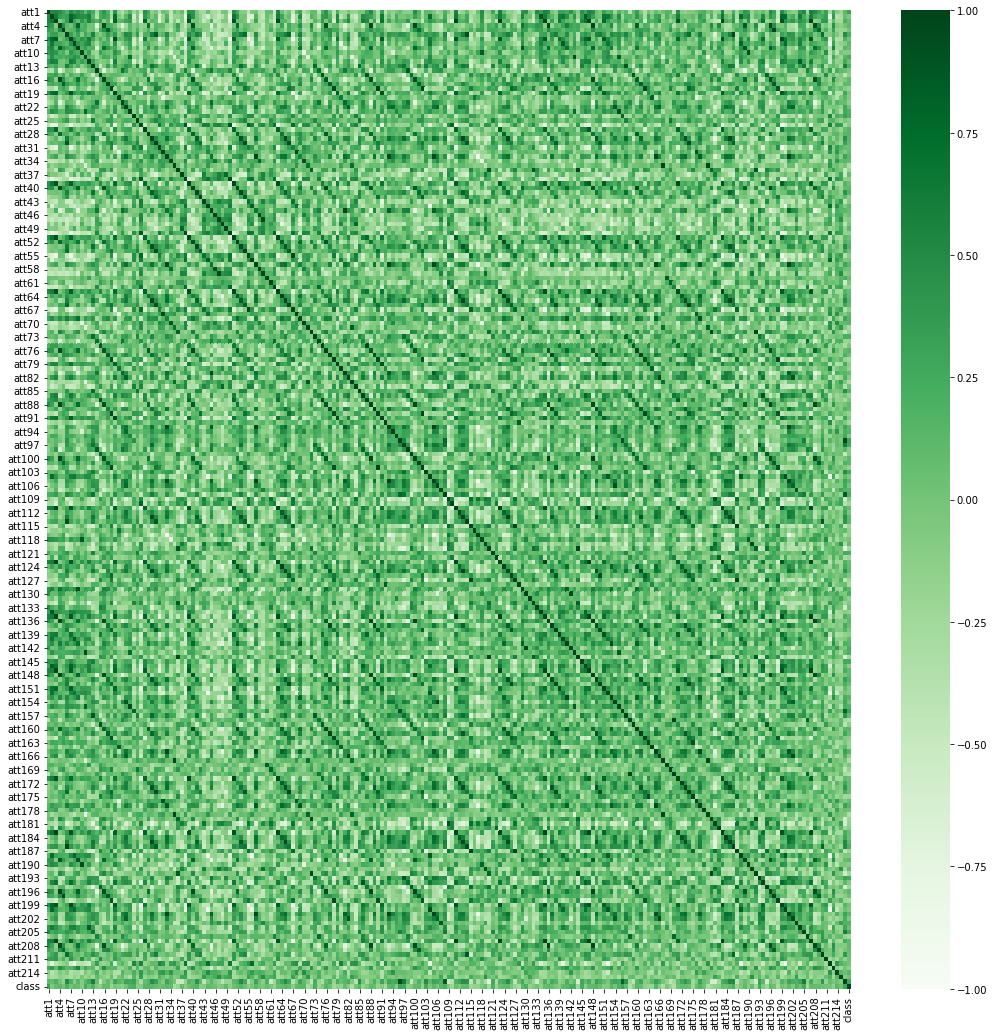

In [370]:
correlations =mfeat_dt.corr()

fig = plt.figure(figsize=(18,18))
sns.heatmap(correlations,vmin=-1, vmax=1,fmt='.2g',cmap='Greens')

plt.show()

In [366]:
mfeat_dt.shape

(2000, 217)

In [373]:
mfeat_dt.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att178,att179,att180,att181,att182,att183,att184,att185,att186,att187,att188,att189,att190,att191,att192,att193,att194,att195,att196,att197,att198,att199,att200,att201,att202,att203,att204,att205,att206,att207,att208,att209,att210,att211,att212,att213,att214,att215,att216,class
0,98,236,531,673,607,647,2,9,3,6,8,5,225,517,652,624,628,994,7,22,28,13,10,19,305,481,667,663,1009,727,38,28,18,11,20,10,287,567,651,742,...,12,19,10,360,328,607,984,1186,599,29,7,14,6,9,9,362,314,924,733,601,1216,4,8,20,10,9,5,251,421,474,536,628,632,18,36,8,15,12,13,1
1,121,193,607,611,585,665,7,9,2,4,3,7,214,514,690,548,630,1006,2,18,31,15,5,15,260,344,655,605,993,743,29,32,25,11,17,6,308,412,719,700,...,8,18,8,351,249,687,922,1194,617,26,11,11,4,10,7,347,439,950,675,577,1222,13,6,27,10,10,3,224,354,520,458,570,634,15,32,11,13,15,11,1
2,115,141,590,605,557,627,12,6,3,3,5,4,196,404,611,560,594,986,7,21,28,14,7,12,278,406,670,579,991,703,24,29,18,12,19,9,378,468,668,654,...,9,20,13,415,323,672,896,1168,595,21,8,14,3,10,12,343,365,877,663,547,1192,18,7,20,13,10,2,196,348,535,498,572,656,20,35,16,14,13,6,1
3,90,122,627,692,607,642,0,6,4,5,3,5,201,445,664,629,626,945,5,21,27,16,7,9,273,397,703,662,987,710,36,29,21,8,15,10,331,459,731,765,...,7,16,10,380,354,711,987,1180,606,27,8,15,5,12,9,400,358,918,756,603,1171,6,7,23,11,12,5,263,419,576,549,628,621,16,35,7,12,15,9,1
4,157,167,681,666,587,666,8,6,1,4,5,5,212,386,740,613,614,997,5,21,30,11,7,17,248,390,703,662,949,744,28,29,20,13,19,10,244,468,797,743,...,8,20,6,337,303,763,989,1156,628,29,8,12,2,10,7,321,337,988,726,577,1225,14,7,22,8,10,5,276,342,594,525,568,653,16,35,10,15,13,13,1


In [709]:
X = mfeat_dt.drop('class',axis=1)
y = mfeat_dt['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [710]:
X_train.shape

(1400, 216)

In [787]:

mfeat_model= Sequential()
mfeat_model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'uniform', input_dim = 216))
mfeat_model.add(BatchNormalization())
mfeat_model.add(Dense(units = 16, activation = 'relu', kernel_initializer = 'uniform'))
mfeat_model.add(Dropout(0.1))
mfeat_model.add(BatchNormalization())
mfeat_model.add(Dense(units = 12, activation = 'relu', kernel_initializer = 'uniform'))
mfeat_model.add(BatchNormalization())
mfeat_model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'uniform'))

sonar_model.add(Dense(units=10, activation='softmax'))


In [788]:
mfeat_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [789]:
tf.random.set_seed(2)
h6=mfeat_model.fit(X_train, Y_train, epochs =12,validation_split=0.1)


Epoch 1/12
40/40 [==============================] - 1s 10ms/step - loss: 4.8829 - sparse_categorical_accuracy: 0.2587 - val_loss: 8.0619 - val_sparse_categorical_accuracy: 0.0571
Epoch 2/12
40/40 [==============================] - 0s 4ms/step - loss: 1.8652 - sparse_categorical_accuracy: 0.5143 - val_loss: 4.6119 - val_sparse_categorical_accuracy: 0.1857
Epoch 3/12
40/40 [==============================] - 0s 4ms/step - loss: 1.3809 - sparse_categorical_accuracy: 0.6087 - val_loss: 4.3587 - val_sparse_categorical_accuracy: 0.0571
Epoch 4/12
40/40 [==============================] - 0s 4ms/step - loss: 1.2625 - sparse_categorical_accuracy: 0.6310 - val_loss: 3.4542 - val_sparse_categorical_accuracy: 0.0786
Epoch 5/12
40/40 [==============================] - 0s 4ms/step - loss: 1.1932 - sparse_categorical_accuracy: 0.6659 - val_loss: 4.7318 - val_sparse_categorical_accuracy: 0.1500
Epoch 6/12
40/40 [==============================] - 0s 4ms/step - loss: 1.7442 - sparse_categorical_accuracy:

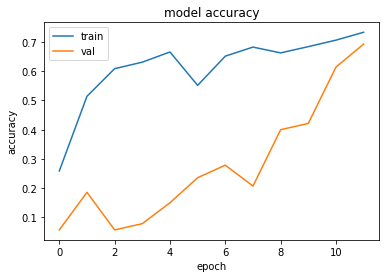

In [790]:
plt.plot(h6.history['sparse_categorical_accuracy'])
plt.plot(h6.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [791]:
test_loss, test_accuracy = mfeat_model.evaluate(X_test, Y_test)
print("Test accuracy:",test_accuracy)

19/19 [==============================] - 0s 2ms/step - loss: 1.1872 - sparse_categorical_accuracy: 0.7317
Test accuracy: 0.7316666841506958
